# Designing and Training a Neural Network on the MNIST Dataset

In [75]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [76]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [77]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [78]:
print("Number of images in the Training dataset is: ", train_images.shape[0])
print("Number of images in the Test dataset is: ", test_images.shape[0])

Number of images in the Training dataset is:  60000
Number of images in the Test dataset is:  10000


In [79]:
print("Shape of the images in the dataset is: ", train_images[0].shape)

Shape of the images in the dataset is:  (28, 28)


## Some Visualizations

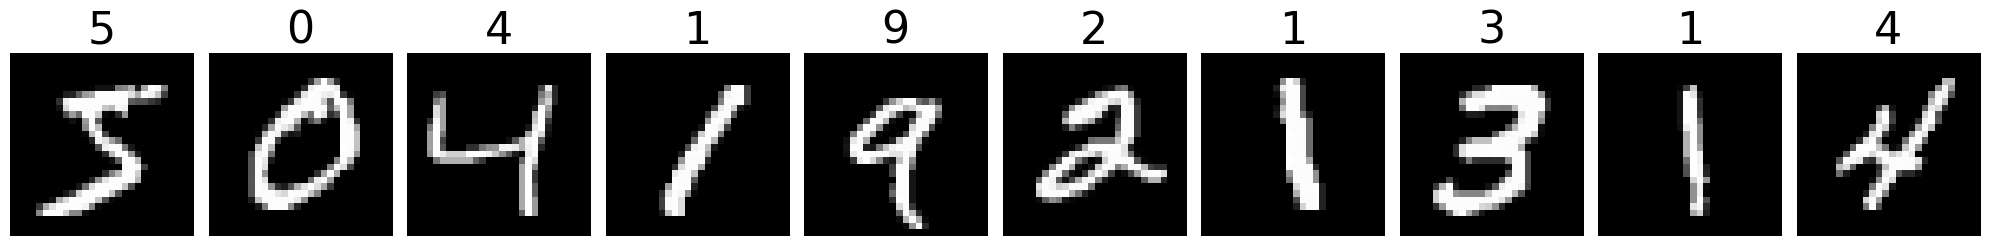

In [80]:
plt.figure(figsize = (20, 5))
for i in range(0, 10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(train_images[i], cmap = "gray")
    plt.title(f"{train_labels[i]}", fontsize = 32)
    plt.axis("off")
plt.tight_layout()
plt.show()

## Creating the Network Architecture

In [81]:
model = models.Sequential([
    layers.Flatten(input_shape = (28, 28, 1)),     # Check this how the layers.Flatten WORKS
    layers.Dense(128, activation = "relu"),
    layers.Dense(64, activation = "relu"),
    layers.Dense(10, activation = "softmax")
])

## Compiling the model with Adam/AdamW Optimizer

In [82]:
model.compile(
    optimizer = 'adamW',           # We could use other optimizers too like the base ADAM optimizer, just the adamW solves for weight decay
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

## Training the model 

In [83]:
history = model.fit(
    train_images,
    train_labels,
    epochs = 10
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9285 - loss: 0.2433
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9694 - loss: 0.1005
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9784 - loss: 0.0698
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9824 - loss: 0.0553
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9863 - loss: 0.0417
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9889 - loss: 0.0348
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9909 - loss: 0.0276
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9918 - loss: 0.0253
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9924 - loss: 0.0223
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9936 - loss: 0.0192


## Visualizing what the model actually thinks?

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[3.1700232e-08 4.2797465e-04 2.0329166e-05 2.5900864e-09 9.9953973e-01
 4.3719295e-10 7.3068378e-08 2.8511490e-06 1.5793667e-09 9.1054208e-06]
Saved plot as prediction_159.png


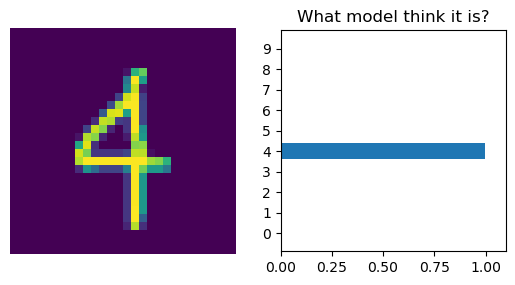

In [84]:
def plot_eval(img_ctr):

    probabilities = model.predict(test_images[img_ctr].reshape(1, 28, 28, 1), test_labels[img_ctr])
    print(probabilities[0])

    fig, (ax1, ax2) = plt.subplots(ncols = 2)
    ax1.imshow(test_images[img_ctr])
    ax1.axis('off')

    ax2.barh(np.arange(10), probabilities[0])
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_title("What model think it is?")
    ax2.set_xlim(0, 1.1)

    filename = f"prediction_{img_ctr}.png"
    fig.savefig(filename, bbox_inches = 'tight')
    print(f"Saved plot as {filename}")

plot_eval(159)

## Model Performance on the testing dataset

In [85]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Accuracy of the neural network on {test_images.shape[0]} images is: {test_accuracy * 100:.2f}% and loss is: {test_loss * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.9737 - loss: 0.1014
Accuracy of the neural network on 10000 images is: 97.37% and loss is: 10.14%


## Model Summary

In [86]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

## Total Parameters

In [87]:
(784 * 128) + (128 * 64) + (64 * 10) + (10 + 128 + 64)    # Biases -> (10 + 128 + 64)

109386

# Neural Network Trained with Model Parallelism (SGD Optimizer)

### Used 2 virtual machines with 4GB RAM and AMD EPYC 9554 Architecture on the Ola Krutrim Cloud

We put 3 layers on VM1 and last layer that is the classification layer on VM2, and then we made the VM's communicate with each other over TCP on the 441 port. The gradients calculated by the VM2 is sent back to the VM1 for changing its weights.

In [58]:
import tensorflow as tf
from tensorflow.keras import layers

In [59]:
first_half = tf.keras.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu")
])

/home/aditya/.local/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [60]:
second_half = tf.keras.Sequential([
    layers.Dense(10, activation = "softmax")
])

second_half(tf.zeros((1, 64)))

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32)>

In [61]:
first_half.load_weights("first_half.weights.h5")
second_half.load_weights("second_half.weights.h5")

In [62]:
full_model = tf.keras.Sequential([
    layers.Flatten(input_shape = (28, 28, 1)),
    layers.Dense(128, activation = "relu"),
    layers.Dense(64, activation = "relu"),
    layers.Dense(10, activation = "softmax")
])

In [63]:
full_model.layers[0].set_weights(first_half.layers[0].get_weights())
full_model.layers[1].set_weights(first_half.layers[1].get_weights())
full_model.layers[2].set_weights(first_half.layers[2].get_weights())
full_model.layers[3].set_weights(second_half.layers[0].get_weights())

print("Model Combined Sucessfully!")

Model Combined Sucessfully!


In [64]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [65]:
x_test = x_test.astype("float32") / 255.0
print(x_test.shape)

(10000, 28, 28)


In [66]:
# Here we are just compiling the model to run the inference, it does not change the weights and biases cuz we are not training it again...
full_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [73]:
loss, acc = full_model.evaluate(x_test, y_test)
print(f"The accuracy of the network in {x_test.shape[0]} images is {acc * 100:.4f}% and loos is {loss * 100:.4f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - accuracy: 0.9071 - loss: 0.3200
The accuracy of the network in 10000 images is 90.7100% and loos is 32.0009%


# Neural Network Trained with Model Parallelism (Adam Optimizer)

### Used 2 virtual machines with 4GB RAM and AMD EPYC 9554 Architecture on the Ola Krutrim Cloud

In [1]:
import tensorflow as tf
from tensorflow.keras import layers

2025-08-16 16:43:52.356455: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-16 16:43:52.367216: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-16 16:43:52.448645: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-16 16:43:52.514538: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755342832.580207 1295166 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755342832.59

In [2]:
first_halfa = tf.keras.Sequential([
    layers.Flatten(input_shape = (28, 28, 1)),
    layers.Dense(128, activation = "relu"),
    layers.Dense(64, activation = "relu")
])

/home/aditya/.local/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-08-16 16:43:56.729222: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [3]:
second_halfa = tf.keras.Sequential([
    layers.Dense(10, activation = "softmax")
])

second_halfa(tf.zeros((1, 64)))

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32)>

In [4]:
first_halfa.load_weights("first_half_adam.weights.h5")
second_halfa.load_weights("second_half_adam.weights.h5")

In [5]:
full_modela = tf.keras.Sequential([
    layers.Flatten(input_shape = (28, 28, 1)),
    layers.Dense(128, activation = "relu"),
    layers.Dense(64, activation = "relu"),
    layers.Dense(10, activation = "softmax")
])

In [8]:
full_modela.layers[0].set_weights(first_halfa.layers[0].get_weights())
full_modela.layers[1].set_weights(first_halfa.layers[1].get_weights())
full_modela.layers[2].set_weights(first_halfa.layers[2].get_weights())
full_modela.layers[3].set_weights(second_halfa.layers[0].get_weights())

print("Model is combined")

Model is combined


In [9]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [10]:
x_test = x_test.astype('float32') / 255.0
print(x_test.shape)

(10000, 28, 28)


In [11]:
full_modela.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [12]:
loss , acc = full_modela.evaluate(x_test, y_test)
print(f"The accuracy is: {acc * 100:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9564 - loss: 0.1359  
The accuracy is: 95.6400
